This tutorial covers the generation of time series signals. It is shown how to create linear interpolated signals and periodic signals (superimposing several frequencies).

In [25]:
import sys

sys.path.append(r"..\src")

import numpy as np
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Linear Signals
Linear interpolated time series signals can be created by specifying points in time `t` and the corresponding values `y`: 

<Axes: xlabel='time'>

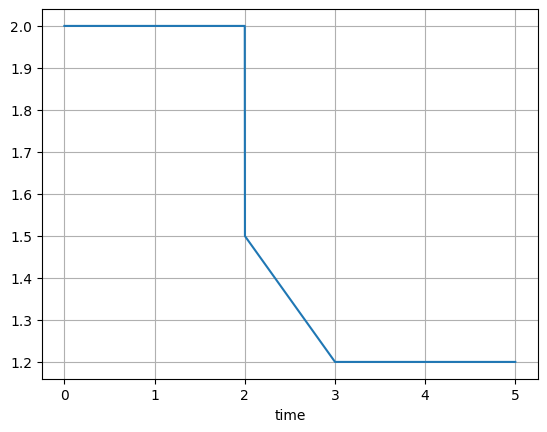

In [26]:
from trimes.signal_generation import linear_time_series

t = (0, 2, 2, 3, 5)
y = (2, 2, 1.5, 1.2, 1.2)
sample_time = 1e-3

ts = linear_time_series(t, y, sample_time)
ts.plot(grid=True)

If `y` is a list, several lines are generated:

<Axes: xlabel='time'>

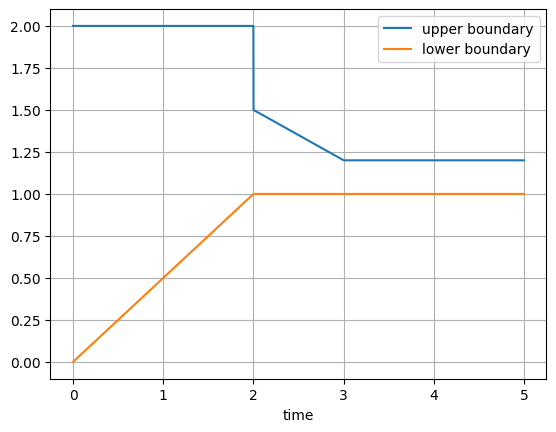

In [27]:
t = (0, 2, 2, 3, 5)
y = [(2, 2, 1.5, 1.2, 1.2), (0, 1, 1, 1, 1)]

ts = linear_time_series(t, y, sample_time)
ts.columns = ("upper boundary", "lower boundary")
ts.plot(grid=True)

Symmetric signals can also be created using `mirror_y` (mirroring of the signal at a y-value):

matplotlib.axes._axes.Axes

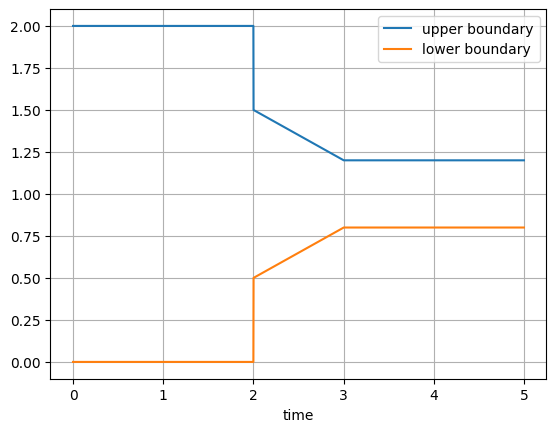

In [28]:
from trimes.signal_generation import mirror_y

upper_boundary = ts.iloc[:, 0]
ts_envelope = mirror_y(upper_boundary, 1, inplace=True)
ts_envelope.columns = ("upper boundary", "lower boundary")
a = ts_envelope.plot(grid=True)
type(a)

# Periodic Signals
The `PeriodicSignal` class can be used to create periodic signals of any shape (flexibly set parameters like frequency, magnitude, offset and initial angle). By default, cosine signals are created:

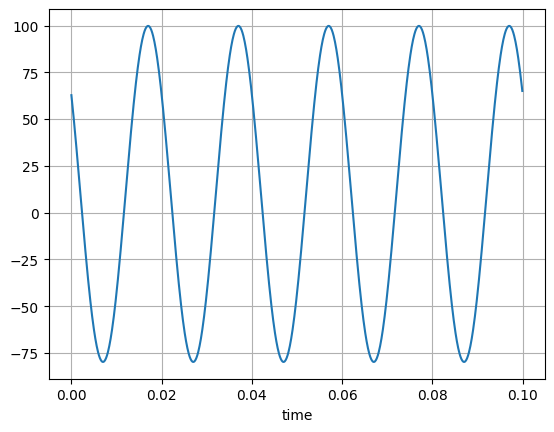

In [29]:
from trimes.signal_generation import PeriodicSignal

sample_time = 1e-4
mag = 110 * np.sqrt(2) / np.sqrt(3)
t = np.arange(0, 0.1, sample_time)
cosine_wave = PeriodicSignal(t, f=50, mag=mag, offset=10, phi=np.pi * 0.3)
cosine_wave_series = cosine_wave.get_signal_series()
cosine_wave_series.plot()
plt.grid()
plt.show()

To create gradients, use tuples as parameters (**don't use lists**).

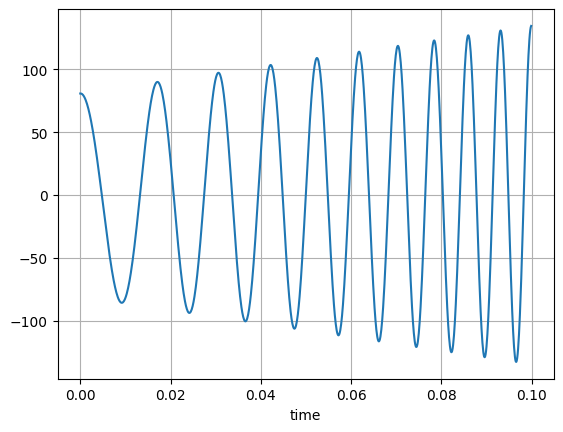

In [30]:
plt.close("all")

cosine_wave = PeriodicSignal(
    np.arange(0, 0.1, sample_time), f=(50, 150), mag=(0.9 * mag, 1.5 * mag)
)
cosine_wave.plot(grid=True)

The `plot_with_attributes` illustrates the signal as well as its parameters over time.

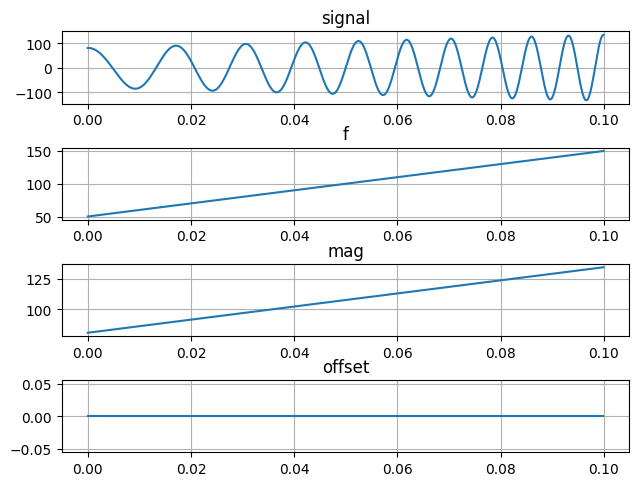

In [31]:
cosine_wave.plot_with_attributes()
plt.grid()

Symmetric multi-phase signals can be created based on the `PeriodicSignal` class by using `get_signal_n_phases` (angular phase difference between signals is $360/n$):

<Axes: xlabel='time'>

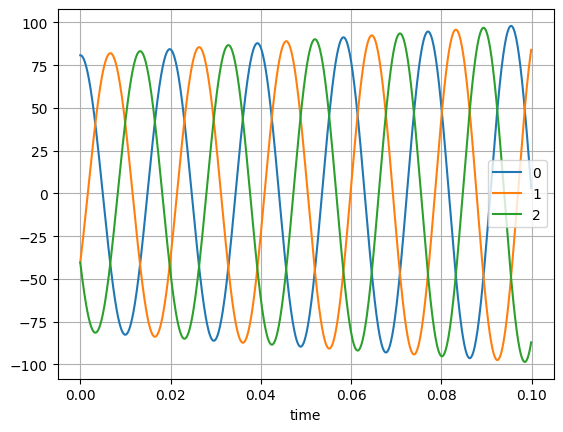

In [34]:
cosine_wave = PeriodicSignal(
    np.arange(0, 0.1, sample_time), f=(50, 55), mag=(0.9 * mag, 1.1 * mag)
)
cosine_wave_series_3_phase = cosine_wave.get_signal_n_phases(3)
cosine_wave_series_3_phase.plot(grid=True)

Signals can be superimposed and concatenated by creating an array of signals. The rows of the array are superimposed and the resulting column is concatenated. The following signal is created:
- two time periods (with varying frequencies)
  - 0-0.1 s
  - 0.1-0.2 s
- several frequencies are superimposed:
  - fundamental: $50$ Hz (actually varies between $50$ and $52$ Hz)
  - fifth harmonic: $5*50=250$ Hz
  - negative sequence: rotating with $-50$ Hz (actually varies between $-50$ and $-52$ Hz)
- $3$ phases

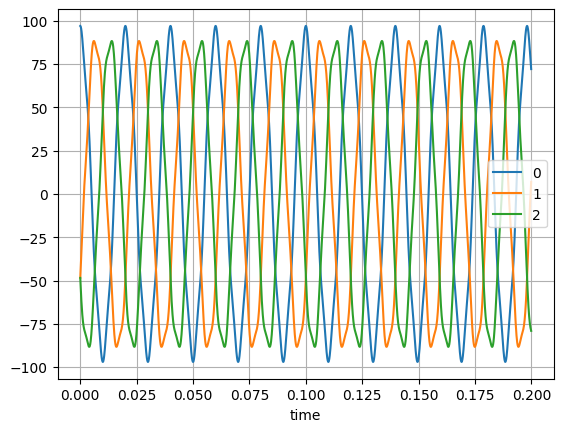

In [35]:
from trimes.signal_generation import (
    superimpose_and_concat_periodic_signals,
)

time_spans = [np.arange(0, 0.1, sample_time), np.arange(0.1, 0.2, sample_time)]
signals = [
    [
        PeriodicSignal(time_spans[0], f=50, mag=mag),
        PeriodicSignal(time_spans[0], f=5 * 50, mag=0.05 * mag),
        PeriodicSignal(time_spans[0], f=-50, mag=0.03 * mag),
    ],
    [
        PeriodicSignal(time_spans[1], f=(50, 52), mag=mag),
        PeriodicSignal(time_spans[1], f=(50 * 5, 52 * 5), mag=0.05 * mag),
        PeriodicSignal(time_spans[1], f=(-50, -52), mag=0.03 * mag),
    ],
]
res = superimpose_and_concat_periodic_signals(
    signals, angle_continuation=True, num_phases=3
)
res.plot()
plt.grid()

The parameters of the signals can be exctracted using `get_attributes_of_superimposed_and_concatenated_signals_over_time` and illustrated:

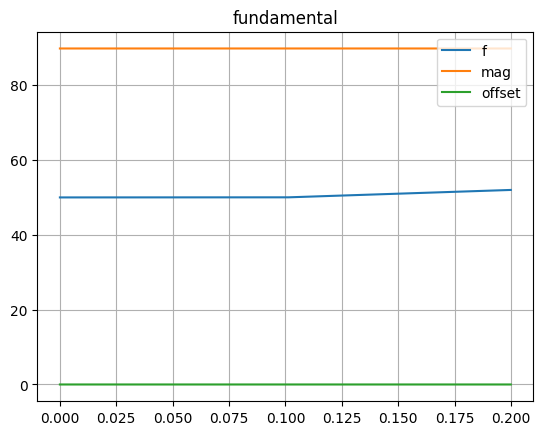

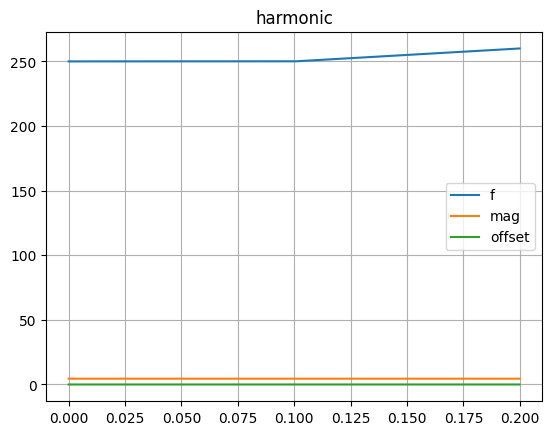

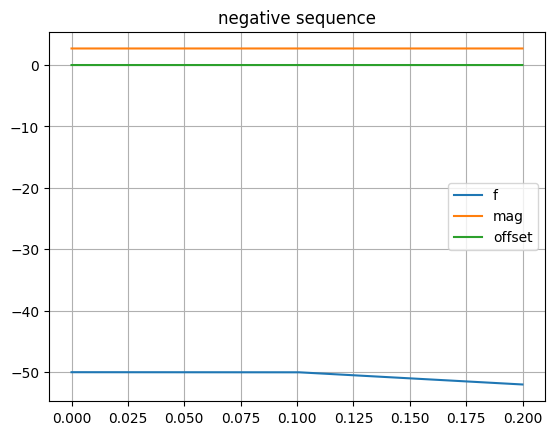

In [36]:
from trimes.signal_generation import (
    get_attributes_of_superimposed_and_concatenated_signals_over_time,
)

attrs_of_columns = get_attributes_of_superimposed_and_concatenated_signals_over_time(
    signals
)
attrs_of_columns[0].plot(title="fundamental")
plt.grid()
attrs_of_columns[1].plot(title="harmonic")
plt.grid()
attrs_of_columns[2].plot(title="negative sequence")
plt.grid()